In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
from datetime import datetime
import statistics
%matplotlib inline

In [2]:
df = pd.read_excel('Douban.xlsx')

In [3]:
pd.set_option('display.max_rows', 200)

In [4]:
df_clean = df.drop_duplicates(subset='电影名')

In [6]:
delete = ['(尚未上映)', '(目前无 )', '(评价人数不足)']
df_clean = df_clean[~df_clean['评分'].isin(delete)]

In [15]:
df_clean = df_clean[df_clean['评价人数'].notnull()]

## Filter voting count to lower than 30 and scrape IMDb link

In [33]:
df = df_clean[df_clean['评价人数'] < 30]

In [35]:
df = df.reset_index()

In [37]:
df.head()

,index,电影名,评分,评价人数,链接,时间,演员
0,136,2010世博记忆,7.8,27.0,https://movie.douban.com/subject/5364916/,2010-11-03 00:00:00,"['中国大陆', '纪录片', '普通话/国语', '英语']"
1,245,45度℃天空下,8.6,28.0,https://movie.douban.com/subject/3919968/,2005-12-06 00:00:00,"['林佑威', '蓝正龙', '黃柏文', '台湾', '王小棣']"
2,403,AWishComeTrue,5.2,28.0,https://movie.douban.com/subject/26321523/,美国,[]
3,415,Bacardi,6.5,28.0,https://movie.douban.com/subject/4010972/,美国,"['PES', '39秒', '动画', '短片', 'PES']"
4,441,BBC伟大的男高音是如何炼成的,8.1,26.0,https://movie.douban.com/subject/5975250/,2010-06-02 00:00:00,"['Rolando Villazón', '英国', 'www.bbc.co.uk/prog..."


In [38]:
errors = []
def imdb_link(row):
    try:
        response = requests.get(row['链接'])
        doc = BeautifulSoup(response.text, "html.parser")
        for item in doc.find_all('span', attrs={'class': 'pl'}):
            if item.text == 'IMDb链接:':
                link = item.next_sibling.next_sibling['href']
                print('Succesful')
                return link
        return np.nan
    except:
        print('Error found on index',row.index)
        errors.append(row.电影名)

In [39]:
%%time
df['imdb_link'] = df.apply(imdb_link, axis=1)

Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful


In [40]:
df.to_csv("Douban_imdblink_lowcount.csv", index=False)

## Scrape IMDb info 

In [41]:
df2 = pd.read_csv('Douban_imdblink_lowcount.csv')

In [104]:
errors = []
def info(row):
    print("processing", row['index'])
    try:
        response = requests.get(row.imdb_link)
        doc = BeautifulSoup(response.text, "html.parser")
        name = doc.find('h1', attrs={'itemprop': 'name'}).text
        rating = doc.find('span', attrs={'itemprop': 'ratingValue'}).text
        ratingCount = doc.find('span', attrs={'itemprop': 'ratingCount'}).text
        genres_raw = doc.find_all('span', attrs={'itemprop': 'genre'})
        genres = []
        for genre in genres_raw:
            genres.append(genre.text)
        print(row['index'])
        return pd.Series({'name': name, 'rating': rating, 'ratingCount': ratingCount, 'genres': ' '.join(genres)})
    except:
        print('Error found on index',row.电影名)
        errors.append(row.电影名)
        return pd.Series({})

In [106]:
df3 = df2.apply(info, axis=1).join(df2)

processing 136
Error found on index 2010世博记忆
processing 136
Error found on index 2010世博记忆
processing 245
Error found on index 45度℃天空下
processing 403
403
processing 415
Error found on index Bacardi
processing 441
Error found on index BBC伟大的男高音是如何炼成的
processing 448
448
processing 541
Error found on index BloodyQueens:ElizabethandMary
processing 583
583
processing 629
629
processing 817
817
processing 997
Error found on index NationalParksAdventure
processing 1025
1025
processing 1030
1030
processing 1108
Error found on index Professional-职业人的作风棋盤上的宇宙不守成規的一手——围棋棋士井山
processing 1198
1198
processing 1208
1208
processing 1307
1307
processing 1371
1371
processing 2263
Error found on index 三界奇侠传
processing 2346
Error found on index 上海青年
processing 2484
2484
processing 2662
2662
processing 2739
2739
processing 2787
2787
processing 3075
Error found on index 中国皇帝在卢浮
processing 3307
3307
processing 3498
3498
processing 4111
Error found on index 他们在岛屿写作：读中文系的人
processing 4225
4225
processing 4246
4

In [108]:
df3.to_csv("Douban_imdblink_all_lowcount.csv", index=False)

In [113]:
df3.shape

(236, 12)

## The Movies that are only popular in the west & the select movies

In [110]:
df3_notnull = df3[df3['name'].notnull()]

In [116]:
df3_notnull['ratingCount'] = df3_notnull['ratingCount'].str.replace(r',', '')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df3_notnull['ratingCount'] = df3_notnull['ratingCount'].str.replace(r'(\(\d\d\d\d)\)', '')

In [118]:
df3_notnull['rating'] = df3_notnull['rating'].astype(float)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [119]:
df3_notnull['name'] = df3_notnull['name'].str.replace(r'(\(\d\d\d\d)\)', '')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [124]:
df4 = df3_notnull[df3_notnull['ratingCount'].astype(int) > 10000]

In [134]:
df4.shape

(4, 12)

In [141]:
df4

,genres,name,rating,ratingCount,index,电影名,评分,评价人数,链接,时间,演员,imdb_link
26,Comedy Drama,20th Century Women,7.4,17834,3498,二十世纪女人,8.2,28.0,https://movie.douban.com/subject/26389928/,2016-10-08(纽约电影节),"['2016-12-25(美国)', '安妮特·贝宁', '格蕾塔·葛韦格', '艾丽·范宁...",http://www.imdb.com/title/tt4385888
47,Comedy Crime Drama,Bad Santa 2,5.5,11818,9192,圣诞坏公公2,5.4,29.0,https://movie.douban.com/subject/10594840/,2016-11-23(美国),"['比利·鲍伯·松顿', '凯西·贝茨', '托尼·考克斯', '克里斯蒂娜·亨德里克斯',...",http://www.imdb.com/title/tt1798603
52,Comedy,Night Shift,6.5,11659,10017,夜迷情,7.8,26.0,https://movie.douban.com/subject/1292635/,1982-07-30 00:00:00,"['亨利·温克勒', '迈克尔·基顿', '凯文·科斯特纳', '美国', '朗·霍华德']",http://www.imdb.com/title/tt0084412
205,Biography Drama Sport,Bleed for This,6.8,13320,61140,浴血而战,5.5,25.0,https://movie.douban.com/subject/4901345/,2016-11-04(美国),"['迈尔斯·特勒', '艾伦·艾克哈特', '凯特蕾·萨加尔', '塞伦·希德', '泰德·...",http://www.imdb.com/title/tt1620935


In [136]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/site-packages/matplotlib/cbook.py:2649: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


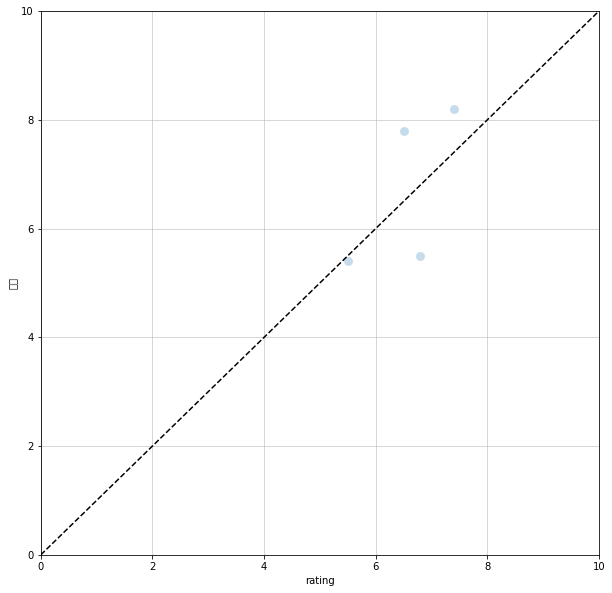

In [137]:
ax = df4.plot(x='rating', 
        y='评分', 
        kind='scatter', 
        xlim=(0,10), 
        ylim=(0,10), 
        linewidth=0, 
        alpha=0.25,
        s=80,
        figsize=(10,10))
ax.grid(linewidth=0.5)
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3", color='black')
#df[df.Continent == 'Africa'].plot(kind='scatter', x='GDP_per_capita', y='life_expectancy', s=100, c='red', ax=ax)

plt.savefig('only_popular_in_west.pdf')

In [131]:
df5 = df3_notnull[df3_notnull['ratingCount'].astype(int) < 10]

In [138]:
df5.shape

(11, 12)

/usr/local/lib/python3.6/site-packages/matplotlib/cbook.py:2649: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


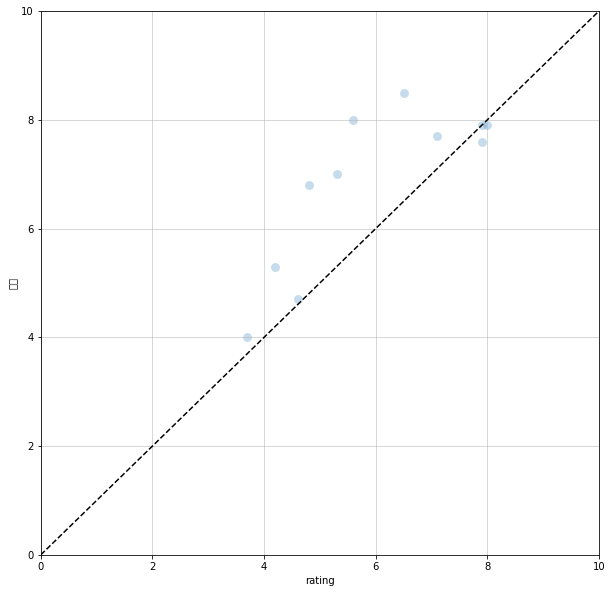

In [139]:
ax = df5.plot(x='rating', 
        y='评分', 
        kind='scatter', 
        xlim=(0,10), 
        ylim=(0,10), 
        linewidth=0, 
        alpha=0.25,
        s=80,
        figsize=(10,10))
ax.grid(linewidth=0.5)
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3", color='black')
#df[df.Continent == 'Africa'].plot(kind='scatter', x='GDP_per_capita', y='life_expectancy', s=100, c='red', ax=ax)

plt.savefig('select.pdf')